# Train a linear model for sentiment classification


# Development environment


In [1]:
# install packages
! pip install scikit-learn
! pip install datasets
! pip install wandb
! pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 7.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 whi

In [2]:
import pandas as pd
from datasets import load_dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
import wandb
import time

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Login to Weights and Biases


In [3]:
wandb.login()


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: johnlohjy (johnlohjy-sutd-singapore-university-of-technology-design) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [4]:
datetime = time.strftime("%Y%m%d-%H%M%S")
wandb.init(
      # Set the project where this run will be logged
      project="sutd-mlops-project",
      # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
      name=f"experiment_session2_run_{datetime}",
      # Track hyperparameters and run metadata
      config={
      "learning_rate": 0.01,
      "loss": "log_loss",
      "penalty": "l2",
      "architecture": "SGDClassifier",
      "dataset_name": "rotten_tomatoes",
      })
config = wandb.config

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


# Prepare data


In [5]:
# Download the Rotten Tomatoes dataset
dataset = load_dataset(config.dataset_name)

# print the first movie review and label
print(dataset["train"][0])

README.md:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

train.parquet:   0%|          | 0.00/699k [00:00<?, ?B/s]

validation.parquet:   0%|          | 0.00/90.0k [00:00<?, ?B/s]

test.parquet:   0%|          | 0.00/92.2k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8530 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1066 [00:00<?, ? examples/s]

{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .', 'label': 1}


In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8530
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
})

In [ ]:
print(dataset["train"].column_names)


['text', 'label']


In [6]:
labels = list(set(dataset['train']['label']))
print("Labels:", labels)

Labels: [0, 1]


In [7]:
dataset["train"].features['label']


ClassLabel(names=['neg', 'pos'], id=None)

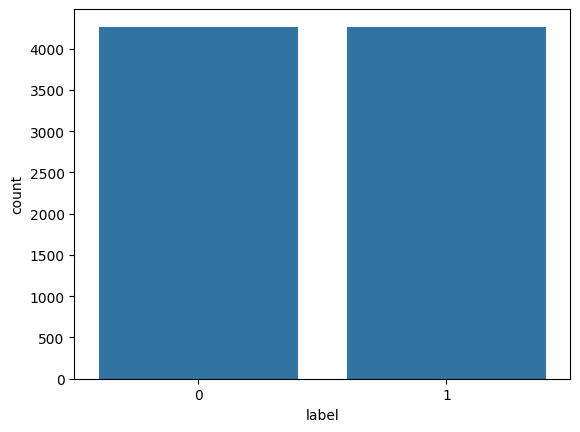

In [ ]:
sns.countplot(x=dataset['train']['label'])
plt.xlabel('label');

In [8]:
train_text = dataset['train']['text']
train_labels = dataset['train']['label']

test_text = dataset['test']['text']
test_labels = dataset['test']['label']

In [9]:
count_vect = CountVectorizer()
train_features = count_vect.fit_transform(train_text)
test_features = count_vect.transform(test_text)


# Train the model


In [10]:
model = SGDClassifier(
            loss = config.loss,
            penalty = config.penalty,
            learning_rate = 'optimal', # 'constant',
            eta0 = config.learning_rate
        ).fit(train_features, train_labels)

# Test the model


In [11]:
test_predicted = model.predict(test_features)
test_proba = model.predict_proba(test_features)
accuracy = metrics.accuracy_score(test_labels, test_predicted)
print(accuracy)

0.7701688555347092


In [12]:
wandb.log({"accuracy": accuracy})
wandb.sklearn.plot_precision_recall(test_labels, test_proba, ["negative", "positive"])



In [13]:
wandb.finish()

accuracy,▁
accuracy,0.77017


# What to try next

- experiment with different training parameters (iterations, learning rate, regulartization, ...)
- experiment with different training set sizes
- the dataset also has a validation set, what is the accuracy here?
- use Weights & Biases plots to get more insights into the model behavior
